In [1]:
%matplotlib inline
import pyamg
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
def indices_ptoc(i,j,ny):
    ind = ny*i +j
    return( ind)
def indices_ctop(ind,ny):
    j=ind%ny
    i=(ind-j)/ny
    return(i,j)
def get_vort(vxo,vyo,nx,ny):
    vorto=zeros_like(vxo)
    for i in arange(1,nx-1):
        for j in arange(1,ny-1):
            vorto[i,j] =(vxo[i,j+1]-vxo[i,j-1])/(2.*dy)\
            -(vyo[i+1,j]-vyo[i-1,j])/(2.*dx)
    return vorto
def get_vort2(vxo,vyo,nx,ny,dx,dy):
    vorto=zeros_like(vxo)
    for i in arange(1,nx-1):
        for j in arange(1,ny-1):
            vorto[i,j] =(vxo[i,j+1]-vxo[i,j-1])/(2.*dy)\
            -(vyo[i+1,j]-vyo[i-1,j])/(2.*dx)
    return vorto
nx = 66
ny=66
i=0
cnt=0
extent = 1.
global dx
dx=extent/nx
#dx=1.                                                                           
global dy
dy=extent/ny

xl=zeros(nx)
yl=zeros(ny)

for i in arange(0,nx):
    if i<nx/2:
        xl[i]=-dx*(nx/2-1-i)
    if i>=nx/2:
        xl[i]=dx*(i+1-nx/2)

for i in arange(0,ny):
    if i<nx/2:
        yl[i]=-dx*(nx/2-1-i)
    if i>=nx/2:
        yl[i]=dx*(i+1-ny/2)



//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
vx=loadtxt("ux.txt",delimiter=',',dtype='string')
vy=loadtxt("uy.txt",delimiter=',',dtype='string')
rho=loadtxt("rho.txt",delimiter=',',dtype='string')
En=loadtxt("E.txt",delimiter=',',dtype='string')

In [4]:
#nx = 64
#ny=64
vxo=zeros((nx,ny))
vyo=zeros((nx,ny))
dno=zeros((nx,ny),dtype='double')
E=zeros((nx,ny),dtype='double')

vxo0=zeros((nx,ny))
vyo0=zeros((nx,ny))
dno0=zeros((nx,ny),dtype='double')
E0=zeros((nx,ny),dtype='double')

ind1=103
for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
    vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
    vyo[indices_ctop(ind,ny)]=vy[ind1][ind]
    dno[indices_ctop(ind,ny)]=rho[ind1][ind]
    E[indices_ctop(ind,ny)]=En[ind1][ind]
    vxo0[indices_ctop(ind,ny)]=vx[0][ind]
    vyo0[indices_ctop(ind,ny)]=vy[0][ind]
    dno0[indices_ctop(ind,ny)]=rho[0][ind]
    E0[indices_ctop(ind,ny)]=En[0][ind]
    

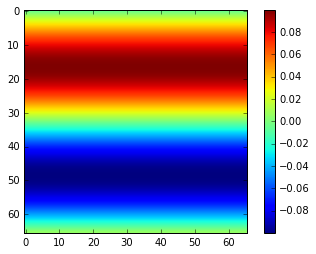

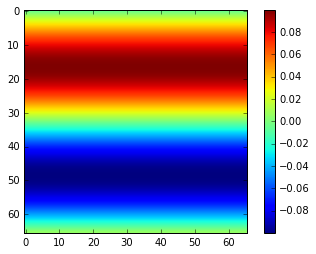

In [5]:
imshow(vxo.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(2)
imshow(vxo0.T)
colorbar()
#print dno[0,0]
#print dno.T.shape
#print vxo[25,:]
#print E[50,:]
#print En[37][100:500]

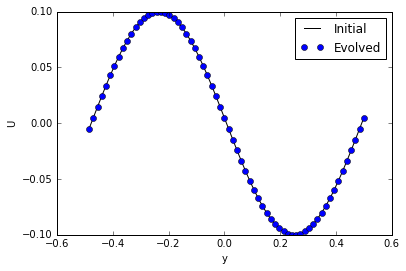

In [6]:
plot(xl,vxo0.T[:,nx/2],'k',label='Initial')
plot(xl[::1],vxo.T[::1,nx/2],'bo',label = 'Evolved')
#plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')
savefig("1dShear_U_64.pdf")

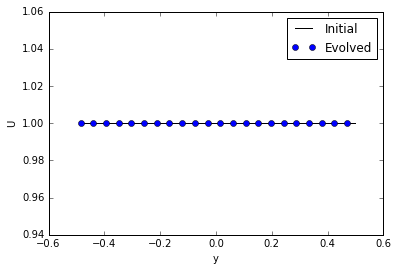

In [7]:
plot(xl,dno0.T[:,nx/2],'k',label='Initial')
plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')
#savefig('1dshear_rho.pdf')


In [84]:
#now for the Hydrostatic Equilibrium Case
vx=loadtxt("output_HydroEq/ux.txt",delimiter=',',dtype='string')
vy=loadtxt("output_HydroEq/uy.txt",delimiter=',',dtype='string')
rho=loadtxt("output_HydroEq/rho.txt",delimiter=',',dtype='string')
En=loadtxt("output_HydroEq/E.txt",delimiter=',',dtype='string')

In [106]:
#nx = 64
#ny=64
vxo=zeros((nx,ny))
vyo=zeros((nx,ny))
dno=zeros((nx,ny),dtype='double')
E=zeros((nx,ny),dtype='double')

vxo0=zeros((nx,ny))
vyo0=zeros((nx,ny))
dno0=zeros((nx,ny),dtype='double')
E0=zeros((nx,ny),dtype='double')

ind1=18
for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
    vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
    vyo[indices_ctop(ind,ny)]=vy[ind1][ind]
    dno[indices_ctop(ind,ny)]=rho[ind1][ind]
    E[indices_ctop(ind,ny)]=En[ind1][ind]
    vxo0[indices_ctop(ind,ny)]=vx[0][ind]
    vyo0[indices_ctop(ind,ny)]=vy[0][ind]
    dno0[indices_ctop(ind,ny)]=rho[0][ind]
    E0[indices_ctop(ind,ny)]=En[0][ind]

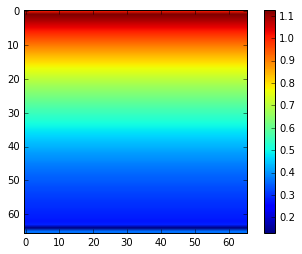

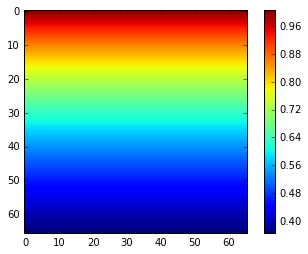

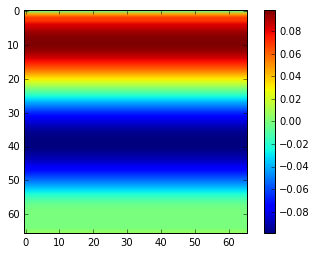

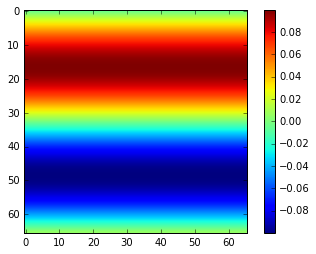

In [107]:
figure(1)
imshow(dno.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(2)
imshow(dno0.T)
colorbar()
figure(3)
imshow(vxo.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(4)
imshow(vxo0.T)
colorbar()

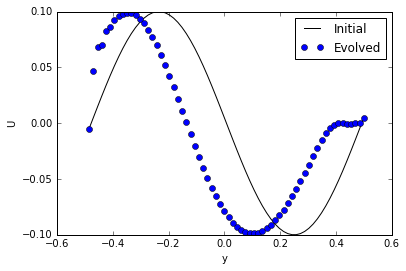

In [108]:
plot(xl,vxo0.T[:,nx/2],'k',label='Initial')
plot(xl[::1],vxo.T[::1,nx/2],'bo',label = 'Evolved')
#plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')

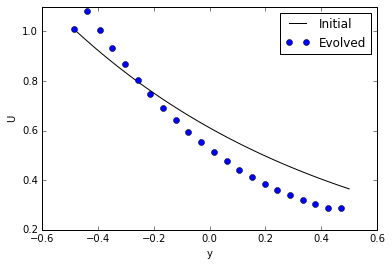

In [109]:
plot(xl,dno0.T[:,nx/2],'k',label='Initial')
plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')

t
t
t
t
t
t
t


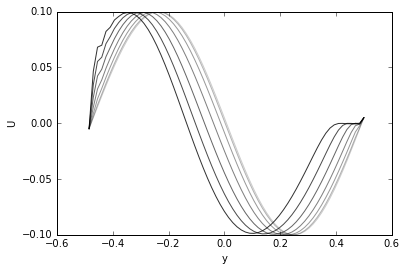

In [120]:
#now set up the evolution plots
alpha1=.1
for ind1 in arange(0,19,3):

    for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
        vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
        
        dno[indices_ctop(ind,ny)]=rho[ind1][ind]
        
        vxo0[indices_ctop(ind,ny)]=vx[0][ind]
        
        dno0[indices_ctop(ind,ny)]=rho[0][ind]
    print "t"
    alpha1+=.1
    plot(xl[::1],vxo.T[::1,nx/2],'k',label = 'Evolved',alpha=alpha1)
    
xlabel('y')
ylabel('U')
savefig("1dShear_HydroEq_U.pdf")

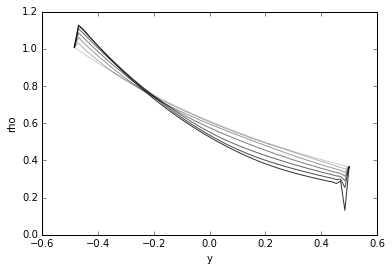

In [121]:
#now set up the evolution plots
alpha1=.1
for ind1 in arange(0,19,3):

    for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
        vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
        
        dno[indices_ctop(ind,ny)]=rho[ind1][ind]
        
        vxo0[indices_ctop(ind,ny)]=vx[0][ind]
        
        dno0[indices_ctop(ind,ny)]=rho[0][ind]
    
    alpha1+=.1
    plot(xl[::1],dno.T[::1,nx/2],'k',label = 'Evolved',alpha=alpha1)
    
xlabel('y')
ylabel('rho')
savefig("1dShear_HydroEq_rho.pdf")